# Multilayer Perceptron Neural Network

### Vocabulary
* Artificial Intelligence: "automate intellectual tasks performed by humans" (Chollet, 2018, p. 4)
  * The originiation of an idea from a computer is not needed. E.g., symbolic AI uses hardcoded instructions (Chollet, 2018, p. 4)
* Machine Learning: a subset of artificial intelligence where examples and expected outputs are used to *train* a computer to the rules (Chollet, 2018)
  * In essence, the machine learning algorithm creates a "new representation of the data" (Chollet, 2018). Just as crucially, it does this by learning from it's previous representation to form a better one
* Deep learning: a subset of machine learning where there are multiple layers of learning (Chollet, 2018)
  * often times, this means that the model can use much simpler transformations, therefore deep learning is often more versatile than other methods
* Tensor: a matrix of data where each axis is a different characteristic 
* Data type: the type of data in the tensor
  * *Note: not the same as how the data is encoded within a tensor*
* Rank: the number of axes (what we would traditionally think of as number of unique dimensions)
* Shape: the number of dimensions along each axis
  * eg. for image data, the shape could be described as (samples, height of image, width, color_depth)
* Broadcasting: what occurs when two tensors of unequal shapes are operating together. 
  * *Note: broadcasting does not require same number of dimensions, but rather the same size of dimensions*
* Dot product/Matrix multiplication: sum of element wise product for vectors; when matrices are multiplied, matrix multiplication is applied by applying dot product
* Weights: the parameters of the neural network that are changed as it learns
* Back Propogation: the general process by which the weights of a neural netowrk
* Gradient: derivative for multiple variables. The idea is that the traditional derivative lacks the information necescary to sum up the data when there are 3+ variables. You can no longer sum up the changes occuring with just a scalar - you need a vector, hence you need a gradient

### Basic Idea of a Perceptron
* A perceptron is as to a artificial neural network as a neuron is to a real neural network
* The perceptron typically consists of 3 things:
  1. An input function that takes the inputs from all other connected neurons and combines them, often by simple summation
  2. A nonlinear activation function
  3. An output
* The non-linearity of the step function is vital because otherwise the neural network would simply be linearly transforming data

### Backpropogation
A neural network has an **loss function** that evaluates how it has done as a whole. Using the data the loss provides, the **optimizer** alters the weights of the neural network. The way that this optimizer works is 

## Categorical (discrete) Data
* Can process all types of data
* Among the most common methods of categorizing data is by having the neural network output a value between 0 and 1 for each category
* The highest value is typically chosen as the predicted category for the data
* However, fuzzy sets, where how much a particular observation matches with the data pose an alternative method that benefits from the precision of the continuous data

## Pros and Cons
* Strength: extremely parallelized processing (greater speed)
* Strenght: applicable to a wide range of problems
* Strenght: Mathematically capable of huge range of solutions
* Weakness: Scientific basis is lacking
* Weakness

<center>Resources</center>
http://library.isical.ac.in:8080/jspui/bitstream/10263/4569/1/308.pdf

Chollet, F. (2018). Deep learning with Python. Manning Publications Co

https://numpy.org/doc/stable/user/basics.broadcasting.html

https://keras.io/guides/sequential_model/

https://www.youtube.com/watch?v=GlcnxUlrtek


In [2]:
# For simplicity's sake, we will use a dataset where each sample can be represented as a vector
import tensorflow as tf
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path="boston_housing.npz", test_split=0.2, seed=113
)
print(x_train.shape)

(404, 13)


In [3]:
# Most layers in our network will use the simple model for a perceptron outlined by Chollet (2018, p. 38)
# output = relu(dot(W, input) + b)
# W and b are initially assigned randomly
# The following code in this cell will be based on Chollet (2018)

import timeit

# For the purpose of understanding, I have constructed this function
def naive_vector_dot(a,b):
    assert a.ndim == 1
    assert b.ndim == 1
    assert b.size == a.size
    
    y = 0
    
    for i in range(a.size):
        # Add up the elementwise product
        y += a[i]*b[i]
    
    return y

random_linear_multiples = np.random.randint(-128, high = 128, size = x_train.shape[1])/128
start = timeit.default_timer()
print(naive_vector_dot(x_train[0], random_linear_multiples))

end = timeit.default_timer()
print(end-start)

# naive_vector_dot is the does the same thing to the vectors of np.dot(a,b); 
# however np.dot() is faster and can handle more axes

start0 = timeit.default_timer()
print(np.dot(x_train[0], random_linear_multiples))
end0 = timeit.default_timer()
print(end0-start0)

# Add in scalar weights 
linear = np.dot(x_train[0], random_linear_multiples) + np.random.randint(-128, 128, size = x_train.shape[1])

# Relu (also known as linear rectifier): max(0, linear)

perceptron_out = np.maximum(0, linear)
print(perceptron_out)

215.079538125
0.000966899999184534
215.079538125
0.31423190000350587
[205.07953812 252.07953812 185.07953812 207.07953812 193.07953812
 202.07953812  96.07953812 221.07953812 216.07953812 111.07953812
 327.07953812 297.07953812 174.07953812]


In [13]:
# gradient descent
# Loss function: output - relu(dot(input, w)+b)
# gradient = derivative of a tensor, which ends up being a tensor of derivatives
# Typically, we would try to find the minimum by determing the weight values where the loss function has the lowest derivative, but this is unviable because it is too computationally expensive
# Instead we "ride the gradient" to where a local minimum of the loss function is

# ReLu has a sharp corner (due to it being a piecewise function where y<0 for x<0 and y=x for x>0) therefore is not differentiable
# However though it is not generally differentiable. it is truly differentiable at all x except x=0
# Therefore it has a derivative of 1 when input > 0, derivatvie 0 when input<0. Because this is an elementwise operation, a derivative will suffice

# XXX: include the bias after doing weights only

import math

def z_score(x_train, x_test):
    # Note that all transformation on the data are based on the training data
    # The goal is to make sure that you don't accidentally train on any aspects of the test data
    mean = x_train.mean(axis = 0)
    std = x_train.std(axis = 0)
    
    x_train_norm = (x_train - mean) / std
    x_test_norm = (x_test - mean) / std
    
    return (x_train_norm, x_test_norm)

def relu(z):
    z[z<0] = 0
    return z

def sigmoid(z):
    return 1/(1 + math.e**(-z))

def sigmoid_prime(z):
    sig = sigmoid(z)
    return sig*(1-sig)
    
def linear(z):
    return z

def linear_prime(z):
    return 1

class neural_network:
    def __init__(self, step_size):
        self.y_hat = None
        self.step_size = step_size
        
    class layer(): 
        """
        Parameters
         ----------
        activation: 
        """
        def __init__(self, num_nodes, activation = None, activation_prime = None, kernel = None, bias = None):
            self.num_nodes = num_nodes
            self.activation = activation
            self.activation_prime = activation_prime
            self.activated = None
            if kernel == None:
                self.kernel = None
            else:
                self.kernel = kernel
            if bias == None:
                self.bias = None
            else:
                self.bias = bias
            
    def network_init(self, *kwargs):
        for i in range(len(kwargs)):
            if i != 0:
                if kwargs[i].kernel == None:
                    kwargs[i].kernel = np.random.rand(kwargs[i-1].num_nodes, kwargs[i].num_nodes)
                if kwargs[i].bias == None:
                    kwargs[i].bias = np.random.rand(kwargs[i].num_nodes)
        return

    
    def fwd_prop(self, x, *kwargs):
        assert x.ndim == 1
        
        for i in range(len(kwargs)):
            if i == 0:
                assert kwargs[i].num_nodes == len(x) 
                kwargs[i].activated = x
            else:
                z = np.dot(kwargs[i-1].activated, kwargs[i].kernel)# + kwargs[i].bias
                kwargs[i].activated = kwargs[i].activation(z)
        self.y_hat = kwargs[-1].activated
        return
    
    def error(self, y):
        assert self.y_hat.ndim == 1
        assert self.y_hat.size == y.size
        
        sq_error = sum((y-self.y_hat)**2)
        mse = sq_error/len(self.y_hat)
        rmse = math.sqrt(sq_error)
        
        return {'sq_error': sq_error, 'mse': mse, 'rmse': rmse}
    
    def bwd_prop(self, y, step_size, *kwargs):
        if step_size == None:
            step_size = self.step_size
        
        # Remember that goal is to minimize error
        # 1/2 used at the start is moot: the step size is scaled to appropriately deal with it
        for i in np.arange(len(kwargs))[::-1]:
            if i-1 >= 0:
                delta = (y-self.y_hat)*kwargs[i].activation_prime(np.dot(kwargs[i-1].activated, kwargs[i].kernel))*(-1)
                #print('size delta and pvs activation', delta.shape,  kwargs[i-1].activated.shape)
                arrs = [kwargs[i-1].activated for j in range(delta.size)]
                stacked_activations = np.stack(arrs)
                dj_dk = np.dot(delta, stacked_activations)
                kwargs[i].kernel = kwargs[i].kernel + np.reshape(dj_dk*step_size*(-1), (-1,1))
        # XXX: can prolly find a way to make this code more compact
        return
    
    def data_shuffle(self, x_train, y_train, indices_or_sections = None):
        assert x_train.shape[0] == y_train.shape[0]
        order = np.arange(x_train.shape[0])
        np.random.shuffle(order)
        x_shuffle = x_train[order]
        y_shuffle = y_train[order]
        
        if indices_or_sections != None:
            x_shuffle = np.split(x_shuffle, indices_or_sections)
            y_shuffle = np.split(y_shuffle, indices_or_sections)
        
        return (x_shuffle, y_shuffle)
    
    def dimension_reducer(a):
        shape = np.array(a.shape)
        shape = shape[shape>1]
        a.reshape(shape)
        return a
        
    
    def runner(self, x_train, y_train, indices_or_sections, x_test, y_test, layers):
        x_splits, y_splits = self.data_shuffle(x_train, y_train, indices_or_sections = indices_or_sections)
        
        assert len(x_splits) == len(y_splits)
        assert x_splits[0].shape[0] == y_splits[0].shape[0]
        
        effective_stepsize = self.step_size/(x_splits[0].shape[0])
        
        count = 0
        for x,y in zip(x_splits, y_splits):
            count += 1
            for i in range(x.shape[0]):
                self.fwd_prop(x[i], *layers)
                self.bwd_prop(y[i], effective_stepsize, *layers)
        sse = 0
        for x,y in zip(x_test, y_test):
            self.fwd_prop(x, *layers)
            sse += self.error(y)['sq_error']
        mse = sse/x_test.shape[0]
        rmse = math.sqrt(mse)
        
        return {'sse':sse, 'mse':mse, 'rmse':rmse}

In [18]:
my_first_ann = neural_network(.1)
my_first_ann.input_layer = my_first_ann.layer(13)
my_first_ann.hidden_layer = my_first_ann.layer(26, activation = sigmoid, activation_prime = sigmoid_prime, kernel = None, bias = None)
my_first_ann.output_layer = my_first_ann.layer(1, activation = linear, activation_prime = linear_prime, kernel = None, bias = None)
my_first_ann.network_init(my_first_ann.input_layer, my_first_ann.hidden_layer, my_first_ann.output_layer)

layers = [my_first_ann.input_layer, my_first_ann.hidden_layer, my_first_ann.output_layer]

In [27]:

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(path="boston_housing.npz", test_split=0.2, seed=113)

print(x_train[0])

x_train, x_test = z_score(x_train, x_test)

print (x_train[0])

for i in range(2):
    errors = my_first_ann.runner(x_train, y_train, 1, x_test, y_test, layers)
    print(errors)
    print(my_first_ann.y_hat)

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
{'sse': 3074.7471437373097, 'mse': 30.14457984056186, 'rmse': 5.490407984891639}
{'sse': 2798.1958841269375, 'mse': 27.43329298163664, 'rmse': 5.2376801144816625}
[25.22136749]


## Creating a simple Keras model
* Keras is a framework of prexisting tools to easily create a model
* Because it has already been developed for years, it has far more options that my custom model

### Vocabulary
* Optimizer: the method by which the gradient resulting from backpropogation is used to adjust the training weights
* RMSprop (optimizer): The rmsprop optimization algorithm is similar to standard (linear) gradient descent, except that it calculates the RMS of the error and divides the squared error by that. The effect is to accentuate the areas with a higher gradient and decrease the effects of others
* Loss function: the function that is differentiated durign the backpropogation process
*  MSE (loss function): produces gradients that are independant of the number of samples. Effectively same as implemented in custom set up.
* K-fold validation: a method of testing hyperparameters without actually using a test dataset. n each "fold" a fraction (1/k) of the training data is left out to act as a defacto test dataset. Then, a few fraction of the data is left out and the process repeats k times.
* Epochs: the number of times the model is trained on the entire dataset
* Batch size: the number of samples trained together. The higher the number of samples together (and for equal train rate), the less each sample contributes to learning, the more averaged the learning is. Smaller batches are often used because they increase learn rate and are more performative because less data is processed at once.
* Stochastic gradient descent: gradient descent where the gradient is computed using a batch size is small. This is particularily useful when you have massive amounts of data and/or have a problem where you might accidentally get stuck in a local minimum. The stochastic part refers to how, because it is not an average, the gradient has a greater variance.

### Batch Size vs Time
* 1 vs 844.5401622999925 s
* 16 vs 73.6799558000057 s
* 64 vs 32.88473919997341 s

In [71]:
# The sequential model is appropriate for models where the flow of information is linear: there is 1 input tensor at the start and 1 output tensor at the end
# Abstraction of the functional API, where instead of each layer being a function, they are grouped together automatically

from tensorflow import keras
from tensorflow.keras import layers

def build_model():
    model = keras.Sequential()
    model.add(layers.Dense(10, activation = "relu", input_shape = (13,), name = 'hidden'))
    model.add(layers.Dense(1, name = 'output'))
    # important to note that the default learn rate for keras rmsprop is .001. This can be changed by passing an rmsprop function with lr = something to the compiler.
    model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
    return model

# Kfolding to determine number of times to train on the model. This is a method of settting hyperparameters without tuning them to the test dataset.
k = 4
size_val = len(x_train) // k
num_epochs = 500
all_mae_histories = []
all_histories = []

start = timeit.default_timer()
for i in range(k):
    x_val = x_train[size_val*i: size_val*(i+1)]
    y_val = y_train[size_val*i: size_val*(i+1)]
    x_partialTrain = np.concatenate([x_train[:i*size_val], x_train[(i+1)*size_val:]])
    y_partialTrain = np.concatenate([y_train[:i*size_val], y_train[(i+1)*size_val:]])
    
    model = build_model()
    # Note that the batch size is set to one. This results in each sample having a far greater effect on the weights.
    history = model.fit(x_partialTrain, y_partialTrain, epochs = num_epochs, batch_size = 16, verbose = 0, validation_data = (x_val, y_val))
    
    all_histories.append(history.history)
    all_mae_histories.append(history.history['val_mae'])
end = timeit.default_timer()

print(end-start)

90.91758459998528


2.5117927


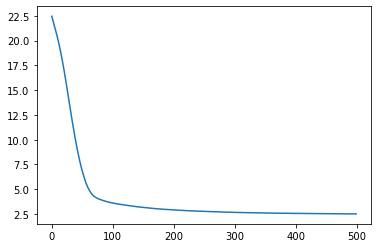

In [72]:
import matplotlib.pyplot as plt

all_mae_histories = np.array(all_mae_histories)
all_mae_histories.shape
mean_mae_hist = np.mean(all_mae_histories, axis = 0)
plt.plot(np.arange(len(mean_mae_hist)), mean_mae_hist)
print(np.min(mean_mae_hist))

In [73]:

model = build_model()
print(x_train.shape, y_train.shape)
model.fit(x_train, y_train, epochs = 80, batch_size = 16, verbose = 0)

test_mse_score, test_mae_score = model.evaluate(x_test, y_test)
print(test_mse_score,test_mae_score)

(404, 13) (404,)
102/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================